# Bootcamp Analista de Machine Learning - Trabalho Prático Módulo 2

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importando dataset 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [ ]:
#Carregando dataset em um dataframe

df = pd.read_csv("KaggleV2-May-2016.csv")

In [ ]:
#Printando as 5 primeiras linhas do dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Q1. Qual é a proporção aproximada de pacientes que compareceram à consulta?

no_show = (len(df[df['No-show'] == 'No'])/df.shape[0])*100

print("A propoção de pacientes que não compareceram foi de {:.4f}%".format(no_show))

#Resposta: Aproximadamente 80%

A propoção de pacientes que não compareceram foi de 79.8067%


In [ ]:
# Q2. Quantas instâncias e atributos existem no dataset, respectivamente?

print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

#Resposta: (110527,14)

Entradas: 110527
Variáveis: 14


In [ ]:
# Q3. Qual das colunas do dataset possuem valores nulos?

df.isnull().sum()

#Resposta: Nenhuma coluna possui valores nulos

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# Q4. Qual é a idade média dos pacientes?

age_mean = df['Age'].mean()
print("A idade média dos pacientes é {:.0f}".format(age_mean))

#Resposta: A média de idade dos pacientes é de 37 anos

A idade média dos pacientes é 37


In [ ]:
# Q5. Em quantas localidades diferentes (Neighbourhood) os pacientes residem?

local = len(df['Neighbourhood'].value_counts())

print("Os pacientes residem em {} diferentes locais".format(local))

#Resposta: 81 locais diferentes

Os pacientes residem em 81 diferentes locais


In [ ]:
# Q6. Comparando apenas a identificação do paciente (PatientId) com o número dos agendamentos das consultas (AppointmentID) o que podemos inferir?

df[['PatientId','AppointmentID']]

#len(df['PatientId'].unique())
#Resposta: Se verificarmos a quantidade de PatientId, o qual representa a identificação única de cada paciente, veremos que se repete algumas vezes, representando
# que um paciente pode realizar mais de um procedimento

,PatientId,AppointmentID
0,2.987250e+13,5642903
1,5.589978e+14,5642503
2,4.262962e+12,5642549
3,8.679512e+11,5642828
4,8.841186e+12,5642494
...,...,...
110522,2.572134e+12,5651768
110523,3.596266e+12,5650093
110524,1.557663e+13,5630692
110525,9.213493e+13,5630323


In [ ]:
# Q7. Quantas variáveis binárias (apenas dois valores) existem no dataset?

df.head()

#Resposta: Variáveis binárias são as que atribuem apenas 2 valores, ou seja, 0 e 1 ou "No" e "Yes". Portanto, são 7 variáveis

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Q8. Quantos valores diferentes encontramos para a variável dos SMS recebidos (SMS_received)?

sms_received = len(df['SMS_received'].unique())

print("A variável SMS Received possui {} valores diferentes".format(sms_received))

A variável SMS Received possui 2 valores diferentes


In [ ]:
# Q9. Qual é a menor e maior idade, respectivamente, presente no dataset?

print("A maior idade presente no dataset é {}".format(df['Age'].max()))
print("A menor idade presente no dataset é {}".format(df['Age'].min()))

A maior idade presente no dataset é 115
A menor idade presente no dataset é -1


In [ ]:
# Q10. Qual foi o tipo de transformação dos dados categóricos realizado?

df_filtrado = df[df['Age'] >= 0]
df_filtrado.shape

(110526, 15)

In [ ]:
#transformando as colunas de data para o tipo data
df_filtrado['ScheduledDay'] = pd.to_datetime(df_filtrado['ScheduledDay'])
df_filtrado['AppointmentDay'] = pd.to_datetime(df_filtrado['AppointmentDay'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tempo_espera = df_filtrado['ScheduledDay'] - df_filtrado['AppointmentDay'] 
tempo_espera

0           0 days 18:38:08
1           0 days 16:08:27
2           0 days 16:19:04
3           0 days 17:29:31
4           0 days 16:07:23
                ...        
110522   -35 days +09:15:35
110523   -35 days +07:27:33
110524   -41 days +16:03:52
110525   -41 days +15:09:23
110526   -41 days +13:30:56
Length: 110526, dtype: timedelta64[ns]

In [ ]:
df_filtrado['AwaitingTime'] = tempo_espera.apply(lambda x: x.days)
df_filtrado.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,-2


In [ ]:
#Transformando a colunas AwaitingTime em valores não negativos

df_filtrado['AwaitingTime'] = df_filtrado['AwaitingTime'].apply(lambda x: abs(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_filtrado.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,2


In [ ]:
#Transformando variáveis categóricas
categoricas=['Neighbourhood','Gender','No-show']

for col in categoricas:
  df_filtrado[col] = pd.Categorical(df_filtrado[col]).codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_filtrado.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,39,0,1,1,0,0,0,0,0


In [ ]:
# Q10. Qual tipo de transformação categórica foi utilizada?

#Resposta: Utilizamos o Label Encoding

72.425455160363


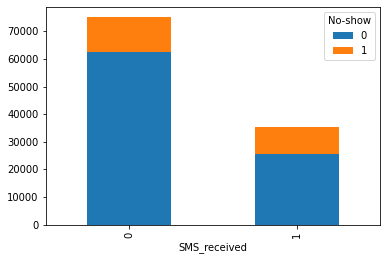

In [ ]:
# Q11. Qual a proporção de pacientes que receberam o SMS mas não compareceram?

sms_received_show = df_filtrado.groupby(['SMS_received','No-show'])['SMS_received'].count().unstack('No-show').fillna(0)
sms_received_show[[0,1]].plot(kind = 'bar', stacked = True)

sms_received_yes = (25698/ (25698+9784))*100
print(sms_received_yes)

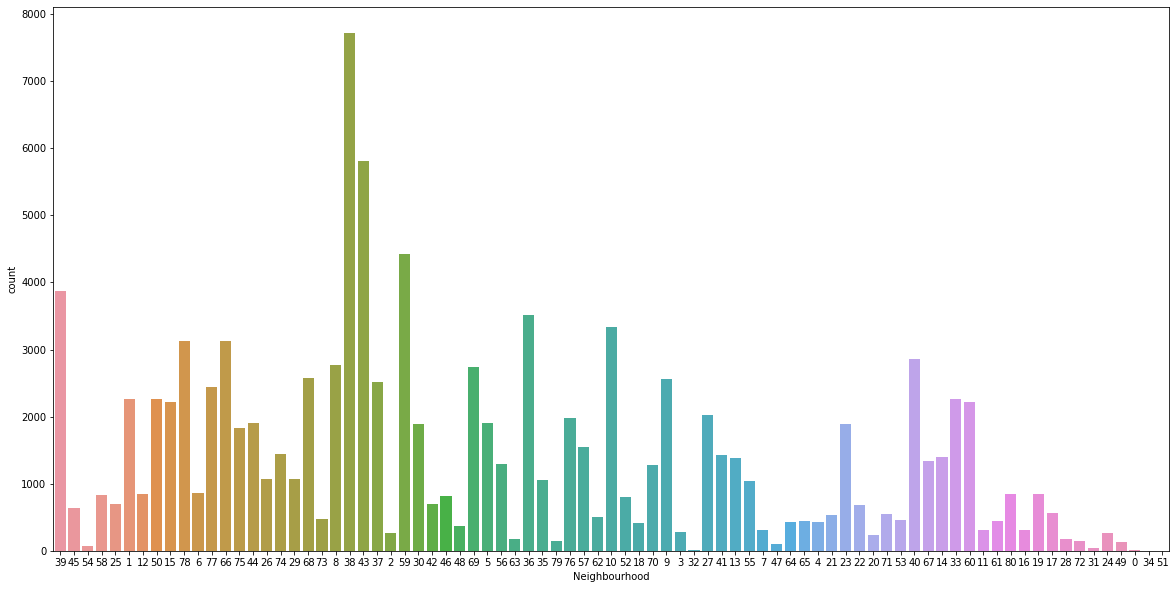

In [ ]:
# Q12. Qual região possui o maior número de consultas marcadas

regioes = df_filtrado.groupby('Neighbourhood')['AppointmentID'].count().sort_values(ascending = False)
regioes_unicas = df_filtrado['Neighbourhood'].unique()

plt.figure(figsize=(20,10))
sns.countplot(x = "Neighbourhood", data = df_filtrado, order = regioes_unicas)


In [ ]:
# Q13. Qual foi a acurácia obtida pelo modelo?

#selecionando os dados para a construção da previsão
entradas = ['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','AwaitingTime']
saida=['No-show']

In [ ]:
#Separando os dados 

X = df_filtrado[entradas]
y = df_filtrado[saida]

In [ ]:
#Importando o train test split do scikit learn

from sklearn.model_selection import train_test_split

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y, test_size = 0.3,random_state = 1)

In [ ]:
X_treino.shape

(77368, 9)

In [ ]:
#Aplicação do modelo de Árvores de Decisão

from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
treino = modelo.fit(X_treino,y_treino)

In [ ]:
y_pred = modelo.predict(X_teste)

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste,y_pred)*100
#Resposta:

print("Acurácia da Árovre de Decisão foi de {:.2f}%".format(acuracia))

Acurácia da Árovre de Decisão foi de 73.32%


In [ ]:
# Q14. Plote a matriz de decisão

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_teste,y_pred))
print(classification_report(y_teste,y_pred))

[[22207  4278]
 [ 4569  2104]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     26485
           1       0.33      0.32      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158



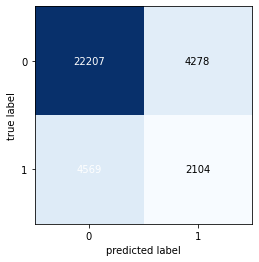

In [125]:
from mlxtend.plotting import plot_confusion_matrix

plot = plot_confusion_matrix(conf_mat = confusion_matrix(y_teste,y_pred), cmap = None, colorbar = False)